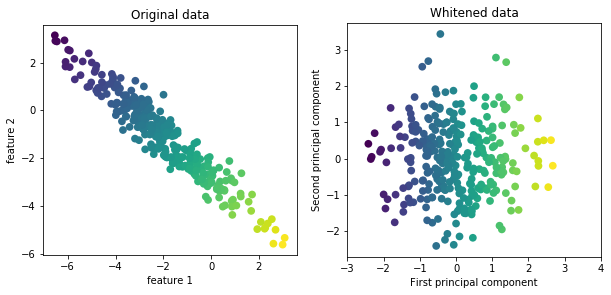

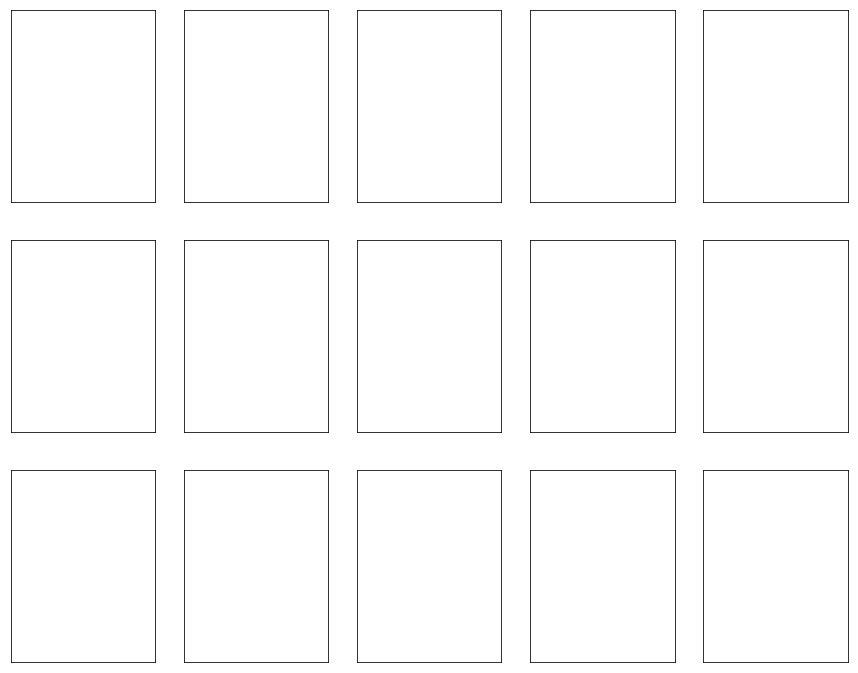

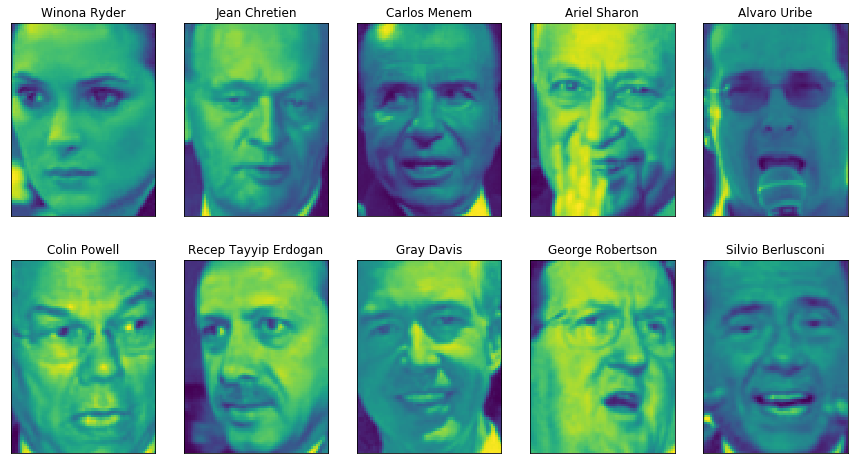

(3023, 87, 65)
62
Alejandro Toledo           39 
Alvaro Uribe               35 Amelie Mauresmo            21 Andre Agassi               36 
Angelina Jolie             20 Ariel Sharon               77 Arnold Schwarzenegger      42 
Atal Bihari Vajpayee       24 Bill Clinton               29 Carlos Menem               21 
Colin Powell              236 David Beckham              31 Donald Rumsfeld           121 
George Robertson           22 George W Bush             530 Gerhard Schroeder         109 
Gloria Macapagal Arroyo    44 Gray Davis                 26 Guillermo Coria            30 
Hamid Karzai               22 Hans Blix                  39 Hugo Chavez                71 
Igor Ivanov                20 Jack Straw                 28 Jacques Chirac             52 
Jean Chretien              55 Jennifer Aniston           21 Jennifer Capriati          42 
Jennifer Lopez             21 Jeremy Greenstock          24 Jiang Zemin                20 
John Ashcroft              53 John Negrop

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape=people.images[0].shape

fig, axes=plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks': (),'yticks': ()})
for target,image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
#plt.subtitle("some_faces")
plt.show()

print (people.images.shape)
print (len(people.target_names))

#count how often each target appears
counts=np.bincount(people.target)
#prints counts next to target names:
for i, (count,name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i+i)%3==0:
        print()
        
mask=np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
X_people=people.data[mask]
y_people=people.target[mask]
#scale the grey-scale values between 0-1 instead of 0 and 255 for numerical stability
X_people=X_people/255

#Use a kneighbor classifier
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
#split data into training and test sets
X_train, X_test, y_train, y_test=train_test_split(X_people, y_people, stratify=y_people, random_state=0)
#build a KNeighborsClassifier with one neighbor
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print ("Knn score: ", knn.score(X_test, y_test))

mglearn.plots.plot_pca_whitening()
pca=PCA(n_components=100, whiten=True).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)
print(X_train_pca.shape)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print ("Knn score: ", knn.score(X_test_pca, y_test))

pca.components_.shape
fig, axes= plt.subplots(3,5, figsize=(15,12),subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("%d. component" % (i+i))